#  Prepare 4 VC Startup Crunchbase Data


# Introduction

This project is the second part of a series of 2 projects prepared for the Startups Network. In this part, we analyzed the provided Crunchbase data to find out the what similarities or differences exist in the type of startup companies that end up getting funding.

## Table of Content

1. [Project 2 : Analyze portfolios from large investment groups to determine Venture Capital trends](#project2)
2. [Project 2 Goals](#goals2)
3. [Information About Crunchbase Ranks](#cb_ratings)
4. [Import Libraries](#libraries)
5. [Load and Explore the Data 2](#data_load2)
6. [Data Preprocessing 2](#preprocessing2)
7. [Data Analysis and Visualization of Findings 2](#eda2)
8. [Conclusions and Recommendations](#conclusions2)
9. [Link to Dashboard 2](#dashboard2)

# **Project 2 Goals**<a id='goals2'></a>

1. To help the startups working in The Network figure out what beneficial traits they already have in their company or what gaps they need to fill in order to be more attractive to investors
2. Which type of investors would be a better fit for them

# **Information About Crunchbase Ranks**<a id='cb_ratings'></a>

Crunchbase Rank is determined by an algorithm that takes into account the number of connections of a profile within the platform, the amount of community engagement, funding events, news articles, acquisitions, and more. These factors decay over time at varying rates depending on the factor (i.e., news decays more quickly than size of funding rounds).

The benefit of Crunchbase Rank is it lets users prioritize their search results by influence. The higher the Rank, the more influential the profile is compared to its peers. The lower the Rank, the less important the profile is to the community.

A company’s Rank isn’t permanent. Events such as product launches, funding events, leadership changes, and news affect a company’s Crunchbase Rank. When events like these happen, it signifies a trend.

https://about.crunchbase.com/blog/influential-companies/

According to the crunchbase, CB rank is determine by company activity and influential potantial to its peers and community:

1. the number of connections of a profile within the platform
2. the amount of community engagement
3. funding events
4. news articles
5. acquisitions

To find what factor/factors can improve CB ratings, I need to analyse these events.

Startup companies qualify for **Unicorn** status with valuations in excess of $1B. This list of startup companies valued at one billion dollars or more provides data on their funding history, investment activities, and acquisition trends.

The Crunchbase **Emerging Unicorn** Board is a curated list of global private companies that are on the path to achieving unicorn status. Powered by Crunchbase's comprehensive data, this list is updated as companies reach a valuation of \\$500 million or more but less than \\$1 billion.

## Import Libraries<a id='libraries'></a>

In [1]:
import pandas as pd 

# change number of columns and rows to display all columns and rows
pd.set_option('display.max_columns', None) # to display all columns in wide tables
pd.set_option('display.max_rows', None) # to display all rows in long tables

from operator import attrgetter

# change columns width to display full data in columns
pd.set_option('display.max_colwidth', None)

# import visualization libraries
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

# to remove unnecessary wornings
import warnings
warnings.filterwarnings('ignore')

# to visualize text
from wordcloud import WordCloud, STOPWORDS

In [2]:
# function to reformat large ticks values in plots
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

## Load and Explore the Data<a id='data_load2'></a>

There are 2 data sets for project 2: Sequoia and Y Combinator investment portfolios.

In [3]:
sequoia_11_16_2022 = pd.read_csv('sequioa-11-16-2022.csv', thousands=',')
sequoia_11_16_2022.head()

Organization Name  \
0            Island   
1         Stairwell   
2         Apollo.io   
3             Glean   
4             Yokoy   

                                       Organization Name URL  \
0   https://www.crunchbase.com/organization/zero-abstraction   
1          https://www.crunchbase.com/organization/stairwell   
2        https://www.crunchbase.com/organization/zenprospect   
3  https://www.crunchbase.com/organization/scio-technologies   
4              https://www.crunchbase.com/organization/yokoy   

                                                                        Industries  \
0        Cyber Security, Enterprise Software, Information Technology, Web Browsers   
1     Cyber Security, Information Technology, Network Security, Security, Software   
2                               Lead Generation, Sales, Sales Automation, Software   
3           Big Data, Enterprise Software, Productivity Tools, SaaS, Search Engine   
4  Artificial Intelligence, Finance, Financial Services, FinTech, Machine Learning   

                      Headquarters Location  \
0              Dallas, Texas, United States   
1  Mountain View, California, United States   
2  San Francisco, California, United States   
3      Palo Alto, California, United States   
4               Zürich, Zurich, Switzerland   

                                                                                                                         Description  \
0                                                   Island is a cyber startup that provides a secure web browser for the enterprise.   
1                    Stairwell is a cybersecurity company that offers an inception platform that any attacker can’t detect or evade.   
2            Apollo.io provides a foundation for end-to-end sales strategies by providing a data platform for built-in integrations.   
3                 Glean provides a work assistant that allows and helps employees find any piece of data through at their workplace.   
4  Yokoy is a FinTech company that offers a spend management platform that automates expense, invoicing, and credit card processing.   

   CB Rank (Company) Company Type  Number of Founders  \
0                103   For Profit                 2.0   
1                290   For Profit                 1.0   
2                485   For Profit                 3.0   
3                634   For Profit                 4.0   
4                729   For Profit                 5.0   

                                                                               Top 5 Investors  \
0                      Sequoia Capital, Insight Partners, Stripes, Cisco Investments, Georgian   
1                    Sequoia Capital, Accel, Acequia Capital (AceCap), Lux Capital, Section 32   
2               Sequoia Capital, Tribe Capital, Y Combinator, Nexus Venture Partners, SV Angel   
3  Sequoia Capital, General Catalyst, Lightspeed Venture Partners, Kleiner Perkins, Slack Fund   
4                      Sequoia Capital, Speedinvest, F10, Left Lane Capital, Swisscom Ventures   

   SEMrush - Monthly Visits  SEMrush - Visit Duration  \
0                   58932.0                     267.0   
1                   37580.0                     494.0   
2                 3536553.0                     709.0   
3                   25948.0                     201.0   
4                   33238.0                     426.0   

   IPqwery - Patents Granted Diversity Spotlight (US Headquarters Only)  \
0                        NaN                                        NaN   
1                        0.0                                        NaN   
2                        NaN                                        NaN   
3                        NaN       South Asian Founded, South Asian Led   
4                        0.0                                        NaN   

           Hub Tags  
0           Unicorn  
1               NaN  
2  Emerging Unicorn  
3           Unicorn  
4  Emerging Unicorn

In [4]:
y_combinator_11_17_2022= pd.read_csv('y-combinator-11-17-2022.csv', thousands=',')
y_combinator_11_17_2022.head()

Organization Name  \
0             GroMo   
1            Pasito   
2  Arc Technologies   
3             Rownd   
4      91Squarefeet   

                                           Organization Name URL  \
0                  https://www.crunchbase.com/organization/gromo   
1                 https://www.crunchbase.com/organization/pasito   
2  https://www.crunchbase.com/organization/arc-technologies-245d   
3                  https://www.crunchbase.com/organization/rownd   
4           https://www.crunchbase.com/organization/91squarefeet   

                                                                                                                  Industries  \
0  Banking, Commercial Insurance, Credit Cards, Finance, Health Insurance, Insurance, InsurTech, Life Insurance, Mobile Apps   
1                                                             Employee Benefits, Finance, FinTech, Human Resources, Software   
2                                                                        Financial Services, FinTech, Funding Platform, SaaS   
3                                                  B2B, Identity Management, Information Technology, Privacy, SaaS, Software   
4                                                                            Business Development, Retail, Retail Technology   

                      Headquarters Location  \
0                   Gurgaon, Haryana, India   
1         New York, New York, United States   
2  San Francisco, California, United States   
3    Raleigh, North Carolina, United States   
4                   Gurgaon, Haryana, India   

                                                                                                                                    Description  \
0  GroMo is a financial product selling app which empowers every Indian to earn money by selling insurance, credit cards, savings accounts etc.   
1             Pasito develops software that gets more employees to use the high deductible health plan (HDHP) and health savings account (HSA).   
2                                    Arc is a full-service finance platform that provides software startups with customized financial products.   
3                                                                                      Rownd is a B2B SaaS frictionless authentication company.   
4                                               91Squarefeet is a retail design and development company that helps offline businesses scale up.   

   CB Rank (Company)        Diversity Spotlight (US Headquarters Only)  \
0                883                                               NaN   
1               1243  Hispanic / Latine Founded, Hispanic / Latine Led   
2               1991                                               NaN   
3               3566                                               NaN   
4               4700                                               NaN   

   Hub Tags  Number of Founders  \
0       NaN                 2.0   
1       NaN                 1.0   
2       NaN                 3.0   
3       NaN                 4.0   
4       NaN                 3.0   

                                                                             Top 5 Investors  \
0       Y Combinator, Rebel Fund, Acequia Capital (AceCap), Goodwater Capital, ACE & Company   
1          Google, Y Combinator, Google for Startups, Core Innovation Capital, FiDi Ventures   
2                   Alumni Ventures, Y Combinator, Pioneer Fund, Torch Capital, Soma Capital   
3  Alumni Ventures, Y Combinator, Asymmetry Ventures, Plug and Play, Bossanova Investimentos   
4      Y Combinator, Stellaris Venture Partners, Quarry, Betatron Venture Group, Nikhil Vora   

   SEMrush - Monthly Visits  SEMrush - Visit Duration  \
0                   86964.0                     138.0   
1                    3345.0                       0.0   
2                    8267.0                       3.0   
3                   42955.0                     182.0   
4

In [5]:
sequoia_11_16_2022.shape

(110, 14)

In [6]:
y_combinator_11_17_2022.shape

(76, 13)

Sequoia data contains infor about 110 companies, Y-combinator data contains info about 76 companies.

In [7]:
sequoia_11_16_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Organization Name                           110 non-null    object 
 1   Organization Name URL                       110 non-null    object 
 2   Industries                                  106 non-null    object 
 3   Headquarters Location                       104 non-null    object 
 4   Description                                 110 non-null    object 
 5   CB Rank (Company)                           110 non-null    int64  
 6   Company Type                                97 non-null     object 
 7   Number of Founders                          94 non-null     float64
 8   Top 5 Investors                             110 non-null    object 
 9   SEMrush - Monthly Visits                    96 non-null     float64
 10  SEMrush - Visi

In [8]:
y_combinator_11_17_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 13 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Organization Name                           76 non-null     object 
 1   Organization Name URL                       76 non-null     object 
 2   Industries                                  71 non-null     object 
 3   Headquarters Location                       70 non-null     object 
 4   Description                                 76 non-null     object 
 5   CB Rank (Company)                           76 non-null     int64  
 6   Diversity Spotlight (US Headquarters Only)  1 non-null      object 
 7   Hub Tags                                    0 non-null      float64
 8   Number of Founders                          52 non-null     float64
 9   Top 5 Investors                             76 non-null     object 
 10  SEMrush - Monthl

## Data Preprocessing<a id='preprocessing2'></a>

In [9]:
# rename pandas columns to lower case

sequoia_11_16_2022.columns = sequoia_11_16_2022.columns.str.lower()

# replace spaces with underscore in columns name
sequoia_11_16_2022.columns = sequoia_11_16_2022.columns.str.replace(' ','_')

In [10]:
sequoia_11_16_2022.head(1)

organization_name                                     organization_name_url  \
0            Island  https://www.crunchbase.com/organization/zero-abstraction   

                                                                  industries  \
0  Cyber Security, Enterprise Software, Information Technology, Web Browsers   

          headquarters_location  \
0  Dallas, Texas, United States   

                                                                        description  \
0  Island is a cyber startup that provides a secure web browser for the enterprise.   

   cb_rank_(company) company_type  number_of_founders  \
0                103   For Profit                 2.0   

                                                           top_5_investors  \
0  Sequoia Capital, Insight Partners, Stripes, Cisco Investments, Georgian   

   semrush_-_monthly_visits  semrush_-_visit_duration  \
0                   58932.0                     267.0   

   ipqwery_-_patents_granted diversity_spotlight_(us_headquarters_only)  \
0                        NaN                                        NaN   

  hub_tags  
0  Unicorn

In [11]:
# rename pandas columns to lower case

y_combinator_11_17_2022.columns = y_combinator_11_17_2022.columns.str.lower()

# replace spaces with underscore in columns name
y_combinator_11_17_2022.columns = y_combinator_11_17_2022.columns.str.replace(' ','_')

In [12]:
y_combinator_11_17_2022.head(1)

organization_name                          organization_name_url  \
0             GroMo  https://www.crunchbase.com/organization/gromo   

                                                                                                                  industries  \
0  Banking, Commercial Insurance, Credit Cards, Finance, Health Insurance, Insurance, InsurTech, Life Insurance, Mobile Apps   

     headquarters_location  \
0  Gurgaon, Haryana, India   

                                                                                                                                    description  \
0  GroMo is a financial product selling app which empowers every Indian to earn money by selling insurance, credit cards, savings accounts etc.   

   cb_rank_(company) diversity_spotlight_(us_headquarters_only)  hub_tags  \
0                883                                        NaN       NaN   

   number_of_founders  \
0                 2.0   

                                                                        top_5_investors  \
0  Y Combinator, Rebel Fund, Acequia Capital (AceCap), Goodwater Capital, ACE & Company   

   semrush_-_monthly_visits  semrush_-_visit_duration  \
0                   86964.0                     138.0   

   ipqwery_-_patents_granted  
0                        NaN

In [13]:
# delete columns I will not use

sequoia_11_16_2022 = sequoia_11_16_2022.drop(columns=['organization_name_url',
                                                     'company_type',
                                                     'diversity_spotlight_(us_headquarters_only)',
                                                      ])
sequoia_11_16_2022.head(1)

organization_name  \
0            Island   

                                                                  industries  \
0  Cyber Security, Enterprise Software, Information Technology, Web Browsers   

          headquarters_location  \
0  Dallas, Texas, United States   

                                                                        description  \
0  Island is a cyber startup that provides a secure web browser for the enterprise.   

   cb_rank_(company)  number_of_founders  \
0                103                 2.0   

                                                           top_5_investors  \
0  Sequoia Capital, Insight Partners, Stripes, Cisco Investments, Georgian   

   semrush_-_monthly_visits  semrush_-_visit_duration  \
0                   58932.0                     267.0   

   ipqwery_-_patents_granted hub_tags  
0                        NaN  Unicorn

In [14]:
y_combinator_11_17_2022 = y_combinator_11_17_2022.drop(columns=['organization_name_url',
                                                     'diversity_spotlight_(us_headquarters_only)',
                                                      ])
y_combinator_11_17_2022.head(1)

organization_name  \
0             GroMo   

                                                                                                                  industries  \
0  Banking, Commercial Insurance, Credit Cards, Finance, Health Insurance, Insurance, InsurTech, Life Insurance, Mobile Apps   

     headquarters_location  \
0  Gurgaon, Haryana, India   

                                                                                                                                    description  \
0  GroMo is a financial product selling app which empowers every Indian to earn money by selling insurance, credit cards, savings accounts etc.   

   cb_rank_(company)  hub_tags  number_of_founders  \
0                883       NaN                 2.0   

                                                                        top_5_investors  \
0  Y Combinator, Rebel Fund, Acequia Capital (AceCap), Goodwater Capital, ACE & Company   

   semrush_-_monthly_visits  semrush_-_visit_duration  \
0                   86964.0                     138.0   

   ipqwery_-_patents_granted  
0                        NaN

In [15]:
# reorganize columns in better way
sequoia_11_16_2022 = sequoia_11_16_2022[['organization_name', 
                                        'description',
                                       'industries',
                                       'headquarters_location',
                                       'cb_rank_(company)', 
                                        'number_of_founders',
                                        'top_5_investors', 
                                        'semrush_-_monthly_visits',
                                        'semrush_-_visit_duration', 
                                        'ipqwery_-_patents_granted', 
                                        'hub_tags']]

In [16]:
sequoia_11_16_2022['main_investor'] = 'Sequoia'

In [17]:
# reorganize columns in better way
y_combinator_11_17_2022 = y_combinator_11_17_2022[['organization_name', 
                                        'description',
                                       'industries',
                                       'headquarters_location',
                                       'cb_rank_(company)', 
                                        'number_of_founders',
                                        'top_5_investors', 
                                        'semrush_-_monthly_visits',
                                        'semrush_-_visit_duration', 
                                        'ipqwery_-_patents_granted', 
                                        'hub_tags']]

In [18]:
y_combinator_11_17_2022['main_investor'] = 'Y Combinator'

In [19]:
sequoia_11_16_2022['headquarters_location'].value_counts()

San Francisco, California, United States     32
New York, New York, United States             8
Mountain View, California, United States      5
Palo Alto, California, United States          4
Paris, Ile-de-France, France                  3
Chicago, Illinois, United States              2
Los Angeles, California, United States        2
San Mateo, California, United States          2
Shanghai, Shanghai, China                     2
Bellevue, Washington, United States           2
Berlin, Berlin, Germany                       2
Zürich, Zurich, Switzerland                   2
Islamabad, Islamabad, Pakistan                1
Santa Clara, California, United States        1
Singapore, Central Region, Singapore          1
Cairo, Al Qahirah, Egypt                      1
Sunnyvale, California, United States          1
Naugatuck, Connecticut, United States         1
Zurich, Zurich, Switzerland                   1
Salem, Massachusetts, United States           1
Rabat, Rabat-Sale-Zemmour-Zaer, Morocco 

In [20]:
y_combinator_11_17_2022['headquarters_location'].value_counts()

Bengaluru, Karnataka, India                  9
San Francisco, California, United States     9
New York, New York, United States            6
Los Angeles, California, United States       4
Seattle, Washington, United States           3
Lagos, Lagos, Nigeria                        2
Mountain View, California, United States     2
Mexico City, Distrito Federal, Mexico        2
Gurgaon, Haryana, India                      2
New Delhi, Delhi, India                      2
Hyderabad, Andhra Pradesh, India             2
Mumbai, Maharashtra, India                   1
Makati, Manila, Philippines                  1
Delaware City, Delaware, United States       1
Lekki, Lagos, Nigeria                        1
Brooklyn, New York, United States            1
Tokyo, Tokyo, Japan                          1
St. Petersburg, Florida, United States       1
Miami, Florida, United States                1
St Louis, Missouri, United States            1
Jaipur, Rajasthan, India                     1
Bangalore, Ka

Zürich hase 2 different spellings. I replace Zürich to Zurich.

In [21]:
sequoia_11_16_2022['headquarters_location'] = sequoia_11_16_2022['headquarters_location'].str.replace('Zürich', 'Zurich')
y_combinator_11_17_2022['headquarters_location'] = y_combinator_11_17_2022['headquarters_location'].str.replace('Zürich', 'Zurich')

In [22]:
# now I would like to combine data to one

data = pd.concat([sequoia_11_16_2022, y_combinator_11_17_2022])

In [23]:
data.shape

(186, 12)

In [24]:
# rename columns

data.columns = ['organization_name', 
                                        'description',
                                       'industries',
                                       'headquarters_location',
                                       'cb_rank', 
                                        'number_of_founders',
                                        'top_5_investors', 
                                        'monthly_visits',
                                        'visit_duration', 
                                        'patents_granted', 
                                        'hub_tags',
                                        'main_investor'
               ]

sequoia_11_16_2022.columns = ['organization_name', 
                                        'description',
                                       'industries',
                                       'headquarters_location',
                                       'cb_rank', 
                                        'number_of_founders',
                                        'top_5_investors', 
                                        'monthly_visits',
                                        'visit_duration', 
                                        'patents_granted', 
                                        'main_investor',
                                        'hub_tags']
y_combinator_11_17_2022.columns = ['organization_name', 
                                        'description',
                                       'industries',
                                       'headquarters_location',
                                       'cb_rank', 
                                        'number_of_founders',
                                        'top_5_investors', 
                                        'monthly_visits',
                                        'visit_duration', 
                                        'patents_granted', 
                                        'hub_tags',
                                        'main_investor']

In [25]:
# replace NaN with 0 and change data type to integer
data['patents_granted'] = data['patents_granted'].fillna(0).astype(int)
data['monthly_visits'] = data['monthly_visits'].fillna(0).astype(int)
data['visit_duration'] = data['visit_duration'].fillna(0).astype(int)

In [26]:
data.head(1)

organization_name  \
0            Island   

                                                                        description  \
0  Island is a cyber startup that provides a secure web browser for the enterprise.   

                                                                  industries  \
0  Cyber Security, Enterprise Software, Information Technology, Web Browsers   

          headquarters_location  cb_rank  number_of_founders  \
0  Dallas, Texas, United States      103                 2.0   

                                                           top_5_investors  \
0  Sequoia Capital, Insight Partners, Stripes, Cisco Investments, Georgian   

   monthly_visits  visit_duration  patents_granted hub_tags main_investor  
0           58932             267                0  Unicorn       Sequoia

In [27]:
data['country'] = data['headquarters_location'].str.split(',').str[2]

In [28]:
data['organization_name'].nunique()

186

There are no duplicates in company names.

## Data Analysis and Visualization of Findings<a id='eda2'></a>

In [29]:
comanies_by_country = data.pivot_table(index='country', 
                                       values='organization_name', 
                                       aggfunc='nunique').sort_values(by='organization_name').reset_index()
comanies_by_country.tail()

country  organization_name
21          Nigeria                  3
22   United Kingdom                  4
23           France                  4
24            India                 21
25    United States                110

In [30]:
fig = px.choropleth(comanies_by_country,
                    locationmode='country names', 
                    locations='country',
                    color='organization_name',
                    labels={'organization_name':'Number of companies'},
                    color_continuous_scale='Deep')

fig.update_layout(title='Members Location by Country', 
                  title_font_size=32,
                  title_x=0.5) 
fig.show()

Most companies received investments were located in USA and India.

In the beginning, I would like to check the correlations between the data frame columns to find out if there is any columns correlate with CB Rank.

In [31]:
corr_matrix = round(data.drop_duplicates(subset=['organization_name']).corr(), 2)

corr_matrix = corr_matrix.rename(index={'cb_rank': 'CB Rank'})
corr_matrix = corr_matrix.rename(index={'number_of_founders': 'Number of Founders'})
corr_matrix = corr_matrix.rename(index={'monthly_visits': 'Monthly Visits'})
corr_matrix = corr_matrix.rename(index={'visit_duration': 'Visit Duration'})
corr_matrix = corr_matrix.rename(index={'patents_granted': 'Patents Granted'})

corr_matrix.columns =['CB Rank', 'Number of Founders', 'Monthly Visits', 'Visit Duration', 'Patents Granted']
corr_matrix

CB Rank  Number of Founders  Monthly Visits  \
CB Rank                1.00               -0.12           -0.10   
Number of Founders    -0.12                1.00            0.17   
Monthly Visits        -0.10                0.17            1.00   
Visit Duration        -0.14               -0.01            0.12   
Patents Granted       -0.01               -0.09            0.01   

                    Visit Duration  Patents Granted  
CB Rank                      -0.14            -0.01  
Number of Founders           -0.01            -0.09  
Monthly Visits                0.12             0.01  
Visit Duration                1.00             0.03  
Patents Granted               0.03             1.00

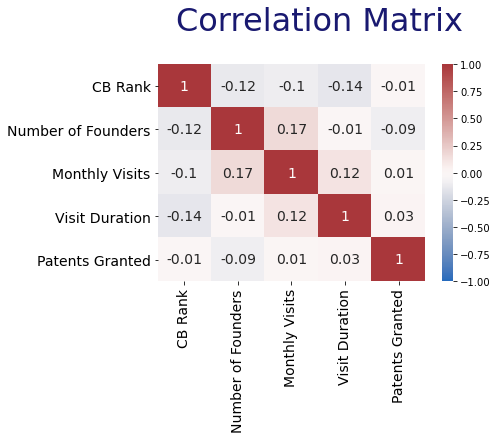

In [32]:
sns.heatmap(corr_matrix, 
            annot=True, 
            vmax=1, 
            vmin=-1, 
            center=0, 
            cmap='vlag',
            annot_kws={"size":14}
           )
plt.suptitle('Correlation Matrix', 
             fontsize=32, 
             color='midnightblue', 
             y=1.08)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

According to the correlation matrix, correlations between columns are very low. It means that CB Rank doesn't directly depend on these events.

I would like to check if the Sequoia and Y Combinator choose companies with about the same ratings and compare companies which were financed by both investors. I compare mean, minimum and maximum ranks.

In [33]:
data_both = (data[(data['top_5_investors'] == 'Sequoia Capital') 
         | (data['top_5_investors'] == 'Y Combinator')]
            )

In [34]:
print(data_both['organization_name'].nunique(), 'companies were financed by both Sequoia and Y Combinator.')

22 companies were financed by both Sequoia and Y Combinator.


In [35]:
# function to build statistics plot to compare Sequoia and Y Combinator companies
def stats_plot(data_sequoia, data_y_combinator, both_companies, plot_name):    
    sequoia_cb_rank_stats = pd.DataFrame(data_sequoia.describe()).reset_index()
    sequoia_cb_rank_stats.columns = ['stats','sequoia']

    y_combinator_cb_rank_stats = pd.DataFrame(data_y_combinator.describe()).reset_index()
    y_combinator_cb_rank_stats.columns = ['stats','y_combinator']

    both_cb_rank_stats = pd.DataFrame(both_companies.describe()).reset_index()
    both_cb_rank_stats.columns = ['stats','both']

    cb_rank_stats = pd.merge(pd.merge(both_cb_rank_stats, y_combinator_cb_rank_stats), sequoia_cb_rank_stats).set_index('stats')
    cb_rank_stats = cb_rank_stats.drop(index=['count', 'std'])
    cb_rank_stats.columns = ['Both', 'Y Combinator', 'Sequoia']

    colors = ['lightblue', 'lightgrey', 'lightgreen']
    ax = cb_rank_stats.plot.barh(                                              
                      color=colors,
                      edgecolor='midnightblue',
                      figsize=(11, 7),
                      width = 0.9
                  )

    # Add annotation to bars
    for p in ax.patches:
        width = p.get_width()    # get bar length
        plt.text(width + width*0.01,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.1f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center',
                fontsize=14, 
                color='midnightblue')     

    plt.ylabel(None)
    plt.title(plot_name, fontsize=32, color='midnightblue')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # Hide the right and top spines
    plt.box(False)

    # Remove x ticks and labels
    plt.tick_params(left = False, right = False , labelleft = True ,
                    labelbottom = False, bottom = False)

    plt.show()            

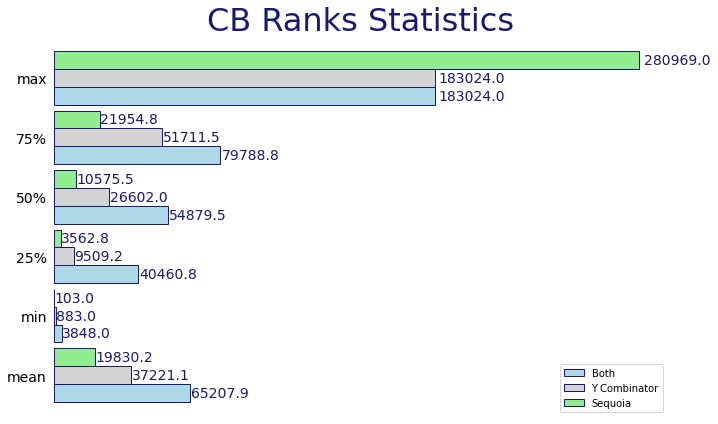

In [36]:
stats_plot(data[data['main_investor']=='Sequoia'].drop_duplicates(subset='organization_name')['cb_rank'],
          data[data['main_investor']=='Y Combinator'].drop_duplicates(subset='organization_name')['cb_rank'],
          data_both['cb_rank'],
          'CB Ranks Statistics')

The average ranks of Sequoia companies are better compared to Y Combinator. On the other hand, Sequoia finances in the companies with broader range of ranks. Both investors finance companies with worse ranks.

In [37]:
# function to build distribution plots for Sequoia and Y Combinator companies

def dist_plot(data1, data2, data3, plot_name, column_name):
    sns.set(style='white', font_scale = 2)
    fig, ax =plt.subplots(1,3, sharex='none')

    fig.suptitle(plot_name, fontsize=32, color='midnightblue')
   # sns.set(font_scale = 2)

    ax[0]=sns.histplot(data = data1,
                bins=16,
                kde = True,
                color = 'lightgreen',
                alpha = 0.5,
                linewidth=1.0,
                edgecolor="black",
                kde_kws={'clip': (0.0, data1.max()+data1.max()*0.1)},
                ax=ax[0])
   # sns.kdeplot(data=data1, color='blue', ax=ax[0])
    ax[0].set_title('Sequoia Data Companies', fontsize=18, color='midnightblue')
    ax[0].ticklabel_format(style='plain', axis='x')
    ax[0].xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

    
    ax[1]= sns.histplot(data = data2,
                bins=16,
                kde = True,
                color = 'lightgrey',
                alpha = 0.5,
                linewidth=1.0,
                edgecolor="black",
                kde_kws={'clip': (0.0, data2.max()+data2.max()*0.1)},
                ax=ax[1]
                )
    ax[1].set_title('Y Combinator Data Companies', fontsize=18, color='midnightblue')
    ax[1].ticklabel_format(style='plain', axis='x')
    ax[1].xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))

    ax[2]= sns.histplot(data = data3,
                bins=16,
                kde = True,
                color = 'lightblue',
                alpha = 0.5,
                linewidth=1.0,
                edgecolor="black",
                kde_kws={'clip': (0.0, data3.max()+data3.max()*0.1)},
                ax=ax[2]
                )
    ax[2].set_title('Both Investors', fontsize=18, color='midnightblue')
    ax[2].ticklabel_format(style='plain', axis='x')
    ax[2].xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values))
    
    #ax[0].set_xlim([0, x_max])
    #ax[1].set_xlim([0, x_max])

    ax[0].figure.set_figwidth(14)
    ax[0].figure.set_figheight(5) 

    #sns.kdeplot(data2, color='blue', linewidth=3, ax=ax[1])
    

    for ax in ax.flat:
        ax.set(xlabel=column_name)
        
    plt.tight_layout()
    plt.show();

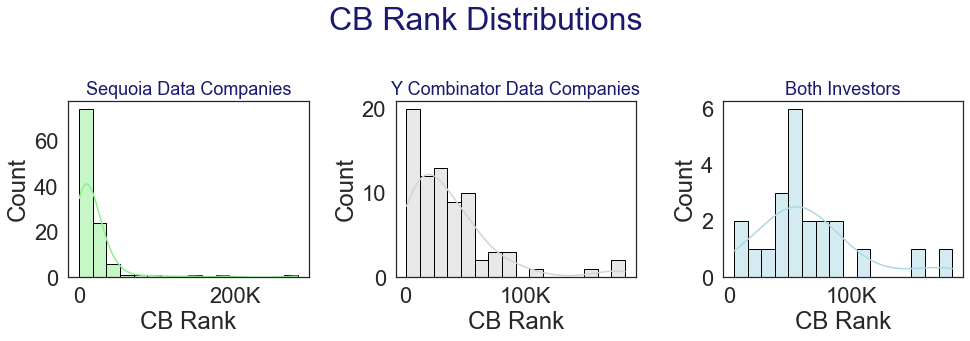

In [38]:
# plot CB Ranks distributions
dist_plot(data[data['main_investor']=='Sequoia'].drop_duplicates(subset='organization_name')['cb_rank'],
          data[data['main_investor']=='Y Combinator'].drop_duplicates(subset='organization_name')['cb_rank'],
          data_both['cb_rank'],
          'CB Rank Distributions', 
          'CB Rank',
          )

Distribution plots show that Sequoia mostly invests in companies with higher (smaller) ranks - 50% of companies have ranks below 10575 but also have several outliers with much worse ranks. Y Combinator in companies with worse ratings - 50% of companies have ranks below 26,602. Companies financed by both investors have much worse ratings - 50% of them rank below 54,880.

Next,
I would like to 'explode' columns with several values: "industries" and "top_5_investors".

In [39]:
data = (data
                       .assign(industries=data['industries']
                               .str.split(','))
                       .explode('industries')
                      )
data['industries'] = data['industries'].str.strip() # remove white space before and after string

In [40]:
data = (data
                       .assign(top_5_investors=data['top_5_investors']
                               .str.split(','))
                       .explode('top_5_investors')
                      )
data['top_5_investors'] = data['top_5_investors'].str.strip() # remove white space before and after string

In [41]:
data_both = (data_both
                       .assign(industries=data_both['industries']
                               .str.split(','))
                       .explode('industries')
                      )
data_both['industries'] = data_both['industries'].str.strip() # remove white space before and after string

In [42]:
data_both = (data_both
                       .assign(top_5_investors=data_both['top_5_investors']
                               .str.split(','))
                       .explode('top_5_investors')
                      )
data_both['top_5_investors'] = data_both['top_5_investors'].str.strip() # remove white space before and after string

Now, I can check which industries get more investment from these 2 investors.

In [43]:
top_5 = data.pivot_table(index='industries', 
                 values='organization_name', 
                 aggfunc='nunique').sort_values(by='organization_name', ascending=True).tail(10)
top_5

organization_name
industries                                
Analytics                               11
SaaS                                    12
Enterprise Software                     12
E-Commerce                              13
Machine Learning                        13
Artificial Intelligence                 17
FinTech                                 27
Financial Services                      29
Information Technology                  31
Software                                64

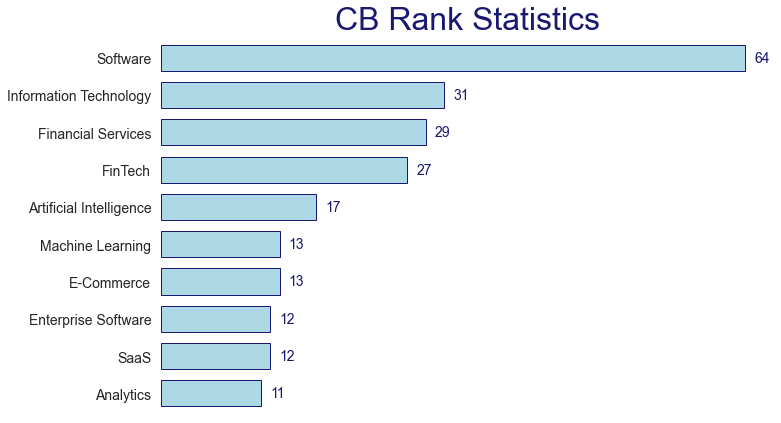

In [44]:
colors = ['lightblue', 'lightgrey']
ax = top_5.plot.barh(                                              
              color=colors,
              edgecolor='midnightblue',
              figsize=(11, 7),
              width = 0.7,
              legend=False
              )

# Add annotation to bars
for p in ax.patches:
    width = p.get_width()    # get bar length
    plt.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',
            fontsize=14, 
            color='midnightblue')     

plt.ylabel(None)
plt.title('CB Rank Statistics', fontsize=32, color='midnightblue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Hide the right and top spines
plt.box(False)

# Remove x ticks and labels
plt.tick_params(left = False, right = False , labelleft = True ,
                labelbottom = False, bottom = False)
    
plt.show()            

In [45]:
Sequoia_top_5_ = data[data['top_5_investors']=='Sequoia Capital'].pivot_table(index='industries', 
                 values='organization_name', 
                 aggfunc='nunique').sort_values(by='organization_name', ascending=False).head(5)
Sequoia_top_5_.columns=['Sequoia top 5']

display(Sequoia_top_5_)

Sequoia top 5
industries                            
Software                            41
Information Technology              22
Artificial Intelligence             17
Financial Services                  16
Machine Learning                    13

In [46]:
Y_combinator_top_5_ = data[data['top_5_investors']=='Y Combinator'].pivot_table(index='industries', 
                 values='organization_name', 
                 aggfunc='nunique').sort_values(by='organization_name', ascending=False).head(5)
Y_combinator_top_5_.columns=['Y_combinator top 5']

display(Y_combinator_top_5_)

Y_combinator top 5
industries                                
Software                                29
FinTech                                 17
Financial Services                      14
Information Technology                  12
B2B                                      7

In [47]:
both_top_5_ = data_both.pivot_table(index='industries', 
                 values='organization_name', 
                 aggfunc='nunique').sort_values(by='organization_name', ascending=False).head(5)
both_top_5_.columns=['Both']

display(both_top_5_)

Both
industries                   
Software                    8
FinTech                     3
Information Technology      3
Financial Services          3
Artificial Intelligence     2

Most interesting industry for these financing companies were Software, IT, Financial Services, and Fin Tech. 

I would like to check the correlations between numerical values in the data.

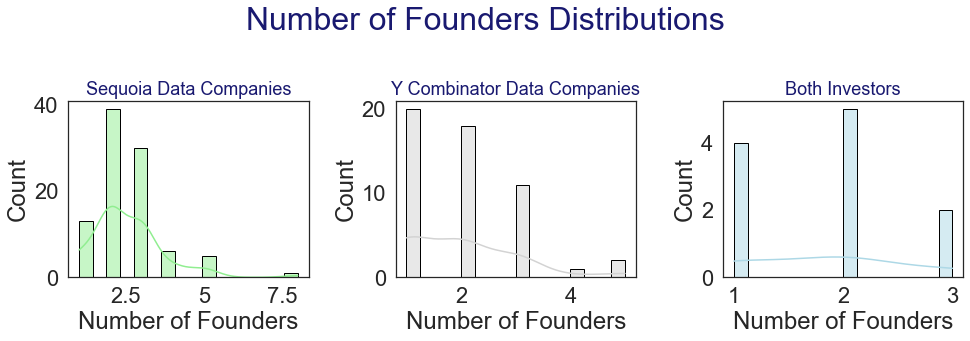

In [48]:
# plot Number of Founders distributions
dist_plot(data[data['main_investor']=='Sequoia'].drop_duplicates(subset='organization_name')['number_of_founders'],
          data[data['main_investor']=='Y Combinator'].drop_duplicates(subset='organization_name')['number_of_founders'],
          data_both.drop_duplicates(subset='organization_name')['number_of_founders'],
          'Number of Founders Distributions', 
          'Number of Founders',
          )

Most companies have from 1 to 3 numbers of founders.

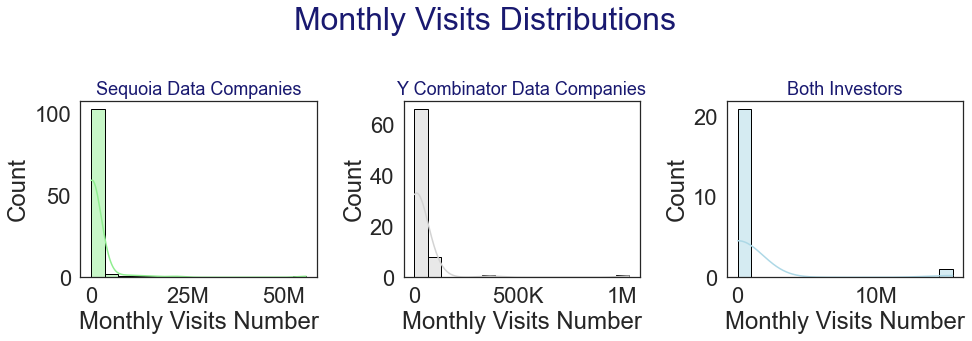

In [49]:
# plot Monthly Visits distributions
dist_plot(data[data['main_investor']=='Sequoia'].drop_duplicates(subset='organization_name')['monthly_visits'],
          data[data['main_investor']=='Y Combinator'].drop_duplicates(subset='organization_name')['monthly_visits'],
          data_both.drop_duplicates(subset='organization_name')['monthly_visits'],
          'Monthly Visits Distributions', 
          'Monthly Visits Number',
          )

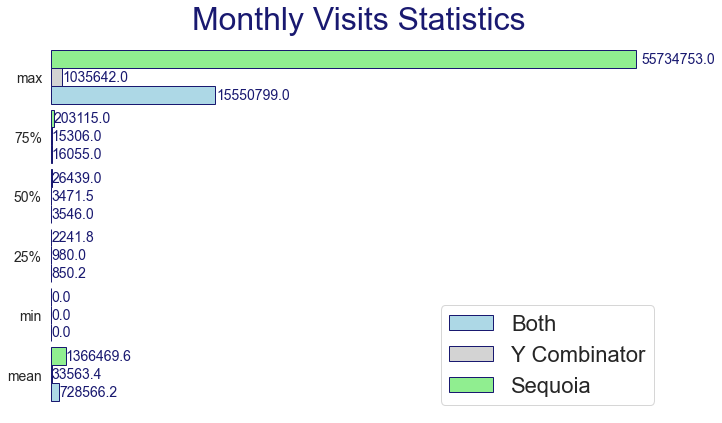

In [50]:
stats_plot(data[data['main_investor']=='Sequoia'].drop_duplicates(subset='organization_name')['monthly_visits'],
          data[data['main_investor']=='Y Combinator'].drop_duplicates(subset='organization_name')['monthly_visits'],
           data_both.drop_duplicates(subset='organization_name')['monthly_visits'],
          'Monthly Visits Statistics')

In [51]:
data_both.drop_duplicates(subset='organization_name')[['cb_rank','organization_name','monthly_visits','visit_duration']]

cb_rank organization_name  monthly_visits  visit_duration
30      3848              VEED        15550799             545
70     16043       Canary Mail          177327             799
99     39835           Synativ               0               0
105    77781         Bluerizon               0               0
16      8718           Versori               0               0
43     31754          HireSure           69339             914
50     40454    AlgoTest India           94335            1822
51     40481            Weltio           17817            1167
56     51628            Rampay            6747             243
57     51962            Entvin           10622             200
59     54179            RootFi               0               0
60     54700         Maya Labs           64834            2934
61     55059             Craze           10769              14
64     59099              PayO            2905             238
65     65067     Cone Software            1703               0
66     70924         FoodCourt             566               0
68     80458              Grai            2457               3
69     88000            Tersho            8160               0
71     89933          Videobug               0               0
72    111616             Raven            3341               0
73    160010          Juicebox            2984               4
75    183024      Coverage Cat            3751               0

The plot shows that Sequoia invests in companies with the most monthly visits. Y Combinator's companies have less visits per month. Both inverstor financed companies without monthly visits. Median visits ware 26,439 and 3471 accordingly. 

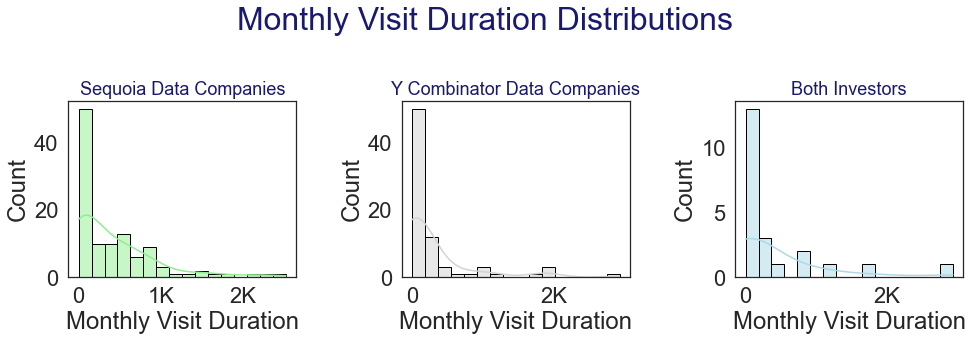

In [52]:
# plot Monthly Visits distributions
dist_plot(data[data['main_investor']=='Sequoia'].drop_duplicates(subset='organization_name')['visit_duration'],
          data[data['main_investor']=='Y Combinator'].drop_duplicates(subset='organization_name')['visit_duration'], 
          data_both.drop_duplicates(subset='organization_name')['visit_duration'],
          'Monthly Visit Duration Distributions', 
          'Monthly Visit Duration',
          )

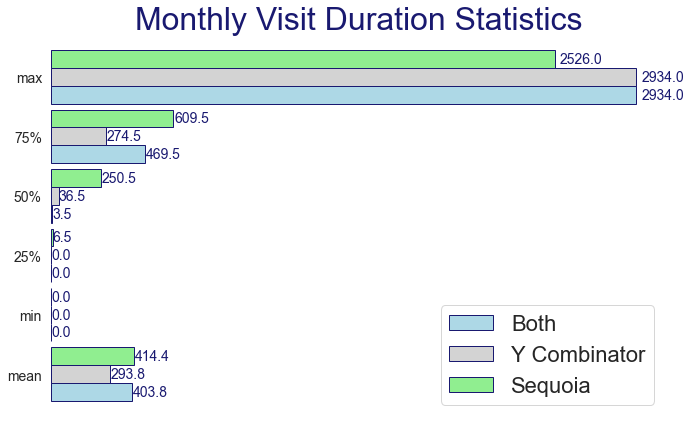

In [53]:
stats_plot(data[data['main_investor']=='Sequoia'].drop_duplicates(subset='organization_name')['visit_duration'],
          data[data['main_investor']=='Y Combinator'].drop_duplicates(subset='organization_name')['visit_duration'],
           data_both.drop_duplicates(subset='organization_name')['visit_duration'],
          'Monthly Visit Duration Statistics')

The plot shows that Sequoia invests in companies with longer visits duration. The average visits duration was 414 for Sequoia company and 294 for Y Combinator company.

In [54]:
patents = data[data['patents_granted']!=0]

In [55]:
patents_table = (patents[(patents['top_5_investors'] == 'Sequoia Capital') 
         | (patents['top_5_investors'] == 'Y Combinator')]
 .drop_duplicates(subset='organization_name')
 .pivot_table(index=['organization_name','cb_rank', 'top_5_investors'], values='patents_granted')
 .reset_index().sort_values(by='cb_rank')
)
patents_table.columns = ['ORGANIZATION NAME', 'CB RANK', 'INVESTOR', 'NUMBER OF PATENTS']
patents_table.reset_index(drop=True)

ORGANIZATION NAME  CB RANK         INVESTOR  NUMBER OF PATENTS
0             Klarna     1186  Sequoia Capital                 15
1  Pyramid Analytics     1824  Sequoia Capital                  2
2               Lilt     2148  Sequoia Capital                  3
3               Bolt     4956  Sequoia Capital                  1
4    thatgamecompany     6837  Sequoia Capital                  1
5             Cresta    17360  Sequoia Capital                  9
6              Clari    21557  Sequoia Capital                 16
7          Medallion    21663  Sequoia Capital                464
8        Atlan Space    26015  Sequoia Capital                  4
9      Salt Security    34924  Sequoia Capital                  1

In [56]:
patents_table.corr()

CB RANK  NUMBER OF PATENTS
CB RANK            1.000000           0.229073
NUMBER OF PATENTS  0.229073           1.000000

Table shows only 10 companies have patents. All those companies were financed by Sequoia. Companies with a big number of patents don’t have the highest rating. So, there is no correlation between the number of patents and CB Rank.

In [57]:
hub_tags = data[data['hub_tags']!=0]
hub_table = (hub_tags[(hub_tags['top_5_investors'] == 'Sequoia Capital') 
         | (hub_tags['top_5_investors'] == 'Y Combinator')]
 .drop_duplicates(subset='organization_name')
 .pivot_table(index=['organization_name','cb_rank', 'top_5_investors'], values='hub_tags', aggfunc='first')
 .reset_index().sort_values(by='cb_rank')
)
hub_table.columns = ['ORGANIZATION NAME', 'CB RANK', 'INVESTOR', 'HUB TAG']
hub_table.reset_index(drop=True)

ORGANIZATION NAME  CB RANK         INVESTOR           HUB TAG
0                  Island      103  Sequoia Capital           Unicorn
1               Apollo.io      485  Sequoia Capital  Emerging Unicorn
2                   Glean      634  Sequoia Capital           Unicorn
3                   Yokoy      729  Sequoia Capital  Emerging Unicorn
4      The Boring Company      747  Sequoia Capital           Unicorn
5               Watershed      827  Sequoia Capital           Unicorn
6        Clipboard Health     1143  Sequoia Capital           Unicorn
7                  Klarna     1186  Sequoia Capital           Unicorn
8                 Athelas     1295  Sequoia Capital           Unicorn
9   Temporal Technologies     1545  Sequoia Capital           Unicorn
10      Pyramid Analytics     1824  Sequoia Capital  Emerging Unicorn
11                 Rupeek     2218  Sequoia Capital  Emerging Unicorn
12                  Vanta     2663  Sequoia Capital           Unicorn
13              Capitolis     2734  Sequoia Capital           Unicorn
14           Hugging Face     3191  Sequoia Capital           Unicorn
15             Magic Eden     4751  Sequoia Capital           Unicorn
16                   Bolt     4956  Sequoia Capital           Unicorn
17        thatgamecompany     6837  Sequoia Capital           Unicorn
18               Rippling     7805  Sequoia Capital           Unicorn
19                  Getir     8239  Sequoia Capital           Unicorn
20                  Cribl     9859  Sequoia Capital           Unicorn
21                Verkada    10701  Sequoia Capital           Unicorn
22               dbt Labs    11285  Sequoia Capital           Unicorn
23           Grafana Labs    14563  Sequoia Capital           Unicorn
24                  Faire    15401  Sequoia Capital           Unicorn
25         Trade Republic    16020  Sequoia Capital           Unicorn
26                 Retool    16156  Sequoia Capital           Unicorn
27                  Front    17340  Sequoia Capital           Unicorn
28                 Cresta    17360  Sequoia Capital           Unicorn
29                  Clari    21557  Sequoia Capital           Unicorn
30           Productboard    22271  Sequoia Capital           Unicorn
31               Ironclad    23440  Sequoia Capital           Unicorn
32                 Mutiny    29645  Sequoia Capital  Emerging Unicorn
33                 Census    31173  Sequoia Capital  Emerging Unicorn
34                 CertiK    32312  Sequoia Capital           Unicorn
35          Salt Security    34924  Sequoia Capital           Unicorn

This table shows that companies with the highest valuations (more than /$1B/) have a range of ranks. So, hub tag itself doesn't influence much on CB Rank.

I wlould like to find out most popular words in the companies descriptions.

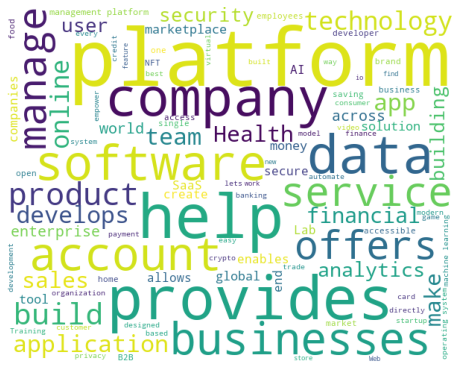

In [58]:
# create word cloud for rejected users

description = ' '.join(data.drop_duplicates(subset=['description'])['description'].tolist())
stopwords = set(STOPWORDS)
def generate_basic_wordcloud(data):
    cloud = WordCloud(width=600,
                      height=480,
                      max_words=100,
                      background_color='white',
                      stopwords= stopwords,
                      collocations=True).generate_from_text(data)
    plt.figure(figsize=(8,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

generate_basic_wordcloud(description)

Most popular words in the companies’ descriptions were platform, help, provides, company.

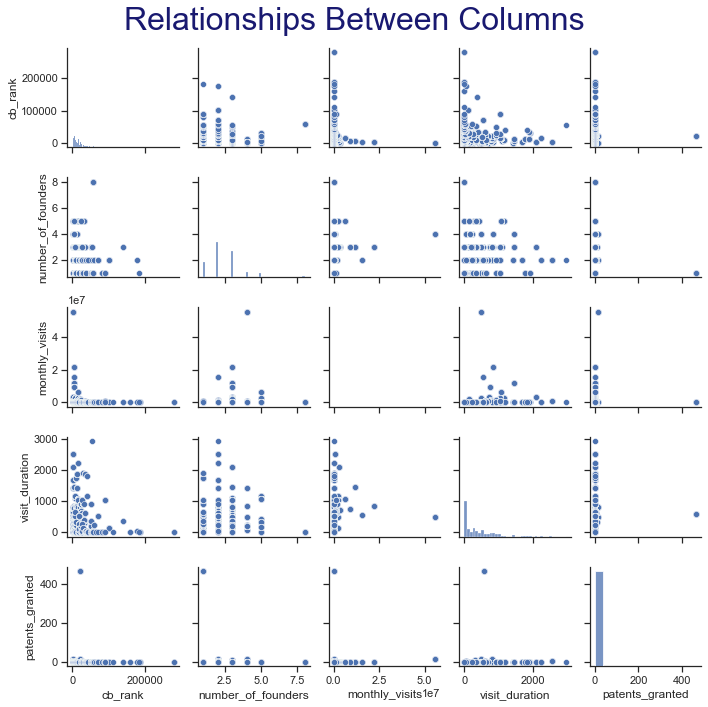

In [59]:
sns.set(style='ticks')

g=sns.pairplot(data, 
             diag_kind='hist',
             height=2,
             #corner=True
              )
g.fig.suptitle('Relationships Between Columns', fontsize=32, color='midnightblue')
plt.tight_layout()

plt.show();


In [60]:
# save prepared data for Dashboard
data.to_csv('data_investors.csv')
sequoia_11_16_2022.to_csv('sequoia_11_16_2022_clean.csv')
y_combinator_11_17_2022.to_csv('y_combinator_11_17_2022_clean.csv')

# Conclusions and Recommendations<a id='conclusions2'></a>

*   Most startups are in USA and India. 
  
*   Most startups financed industries are Software, IT, Financial Services and FinTech 
  
*   Correlations between CB Rank and other categories in the given datasets are very low. It means these categories don’t influence the CB Rank itself but can possibly improve the rank all together with other categories like founding rounds, news articles, and others. 
  
*   Both Sequoia and Y Combinator invest in companies with various CB Ranks, number of founders, visits, and other categories. 
  
*   Sequoia in general invests in bigger companies with better CB Ranks, more and longer visits, patents and hub tags. 
  
*  Y Combinator probably takes more risks investing with smaller companies with worser ranks and other indicators. 
  
*   To improve and keep a good CB Rank, companies need to stay active, try to influence the community, and make news if possible. 
  
*   Startups with worse CB Ranks also have chances to get investments with the right investor. 

# Link to Dashboard 2<a id='dashboard2'></a>

https://public.tableau.com/views/InvestorsPortfolios/Story1?:language=en-US&:display_count=n&:origin=viz_share_link

<div class='tableauPlaceholder' id='viz1672200239458' style='position: relative'><noscript><a href='#'><img alt='Story 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;In&#47;InvestorsPortfolios&#47;Story1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='InvestorsPortfolios&#47;Story1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;In&#47;InvestorsPortfolios&#47;Story1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1672200239458');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1026px';vizElement.style.height='1012px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [61]:
%%html
<div class='tableauPlaceholder' id='viz1672200394776' style='position: relative'><noscript><a href='#'><img alt='Story 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;In&#47;InvestorsPortfolios&#47;Story1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='InvestorsPortfolios&#47;Story1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;In&#47;InvestorsPortfolios&#47;Story1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1672200394776');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1026px';vizElement.style.height='1012px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>